## 2Ï∞® Í≥ºÏ†ú

- Ï£ºÏ†ú: Îç∞Ïù¥ÌÑ∞ ÌÅ¨Î°§ÎßÅÏùÑ ÌôúÏö©Ìïú Îâ¥Ïä§ & Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù
- Îç∞Ïù¥ÌÑ∞: ÏûêÏú†Î°≠Í≤å ÌÅ¨Î°§ÎßÅ
- ÏÇ¨Ïö© ÎùºÏù¥Î∏åÎü¨Î¶¨: selenium, beautifulsoup, etc.

### 1. Îâ¥Ïä§ Í∏∞ÏÇ¨ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Î°§ÎßÅ

1.1 ÏõêÌïòÎäî Îâ¥Ïä§ Í∏∞ÏÇ¨Ïùò Î≥∏Î¨∏ÏùÑ ÌÅ¨Î°§ÎßÅÌïòÏãúÏò§.

In [1]:
from collections import Counter
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

C:\Users\HamIG\AppData\Local\Temp\ipykernel_51384\3371499652.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
url = "https://www.thescoop.co.kr/news/articleView.html?idxno=301147"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
text = soup.get_text()

1.2 ÌÅ¨Î°§ÎßÅÌïú Î≥∏Î¨∏ÏùÑ Îã®Ïñ¥ Îã®ÏúÑÎ°ú ÎÇòÎàÑÍ≥† Í∞Å Îã®Ïñ¥Í∞Ä ÎÇòÏò® ÌöüÏàòÏôÄ Ìï®Íªò dataframe ÌòïÏãùÏúºÎ°ú Î≥ÄÌôòÌïòÏãúÏò§.

In [3]:
#Î≥¥Í≥†Ïûê ÌïòÎäî Ìñâ Ïàò Í≤∞Ï†ï 
pd.set_option('display.max_rows', 10) 

#ÌÖçÏä§Ìä∏ Î∂ÑÌï†
word = text.split()

#Í∞Å Îã®Ïñ¥Ïùò Îì±Ïû• ÌöüÏàò Í≥ÑÏÇ∞
word_count = Counter(word)

df = pd.DataFrame(list(word_count.items()), columns=["Îã®Ïñ¥", "ÌöüÏàò"])

#Îã®Ïñ¥ Îì±Ïû• ÌöüÏàò ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
df_sort = df.sort_values(by='ÌöüÏàò', ascending=False)

df_sort

Îã®Ïñ¥  ÌöüÏàò
1         ÎîîÎèÑÏä§  42
461        Ï†ÑÏ≤¥  32
840         :  17
1218  Edition  13
141       Í≥µÍ≤©ÏùÑ  12
...       ...  ..
566       ÌñàÍ≥†,   1
565      Ï†ëÏñ¥ÏïºÎßå   1
564      ÏÉÅÎãπÏàòÎäî   1
562     Î∞úÏÉùÌñàÏ£†.   1
1468   Ï†ÑÏ≤¥Î©îÎâ¥Îã´Í∏∞   1

[1469 rows x 2 columns]

1.3 Î∂àÏö©Ïñ¥Î•º Ï†úÍ±∞ÌïòÏãúÏò§.

In [5]:
# Î∂àÏö©Ïñ¥, Ïà´Ïûê, ÌäπÏàò Í∏∞Ìò∏ ÏßëÌï© 
stop_words = set(["ÏùÄ", "Îäî", "Ïù¥", "Í∞Ä", "ÏùÑ", "Î•º", "Ï¢Ä", "Ïûò", "ÏûêÏ£º", "Í≥º", "ÏúºÎ°ú", "Ïóê", "ÏôÄ", "Ìïú", "Ïùò", "ÎçîÏä§Ïø†ÌîÑ", "Ï†ÑÏ≤¥", "Edition", "Ïàò", "ÎÖÑ", "ÌõÑ", "Ë¶ñÎ¶¨Ï¶à", "Í≥µÍ≤©ÏùÑ", "Cover", "Í∑∏", 
                  "Î∞îÎ°úÍ∞ÄÍ∏∞", "Îì±", "ÏûàÎã§Îäî", "ÏûàÏäµÎãàÎã§", "ÎåÄ", "Îã´Í∏∞", "ÎåìÍ∏Ä", "Story", "Special", "Í≤ΩÍ∏∞Î•º", "Ïù¥ÌòÅÍ∏∞", "Editors", "Í≥µÍ≤©Ïù¥", "Í≥µÍ≤©ÏúºÎ°ú"])
num_regex = re.compile(r'\d+')
symbol_regex = re.compile(r'[^\w\s]')

# Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Ìï®Ïàò 
def clean_text(text):
    text = symbol_regex.sub('', text)  
    text = num_regex.sub('', text)      
    words = text.split()                
    filtered_words = [word for word in words if word not in stop_words]  
    return filtered_words

# ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨
cleaned_word = clean_text(text)

# Í∞Å Îã®Ïñ¥Ïùò Îì±Ïû• ÌöüÏàò Í≥ÑÏÇ∞
word_count = Counter(cleaned_word)

# Îì±Ïû• ÌöüÏàòÍ∞Ä 1ÌöåÏù∏ Îã®Ïñ¥Îäî Ï†úÍ±∞ 
filtered_word_counts = {word: count for word, count in word_count.items() if count > 1}

# DataFrame ÏÉùÏÑ±
df_news = pd.DataFrame(list(filtered_word_counts.items()), columns=["Îã®Ïñ¥", "ÌöüÏàò"])

# Ï∂úÎ†•
df_news

Îã®Ïñ¥  ÌöüÏàò
0     Î¨ªÏßÄÎßà   4
1     ÎîîÎèÑÏä§  45
2      Í≥µÍ≤©  10
3      Ïù¥Ï†ú   4
4     ÎãπÏã†ÏùÑ   3
..    ...  ..
274   Í≤ΩÏ†úÎ•º   3
275   Í≤ΩÏ†úÌïô   2
276    ÎààÎ¨º   4
277   ÌïòÎ∞òÍ∏∞   4
278  Í≤ΩÏ†úÏ†ÑÎßù   2

[279 rows x 2 columns]

1.4 Ï≤òÎ¶¨Ìïú Îç∞Ïù¥ÌÑ∞Î•º ÏõåÎìúÏïÑÌä∏Î°ú Î≥ÄÌôòÌï¥ Ïñ¥Îñ§ Îã®Ïñ¥Í∞Ä Í∞ÄÏû• ÎßéÏù¥ ÎÇòÏôîÎäîÏßÄ ÌôïÏù∏ÌïòÏãúÏò§(Ìè∞Ìä∏, ÏÉâ Îì± ÏûêÏú†).

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

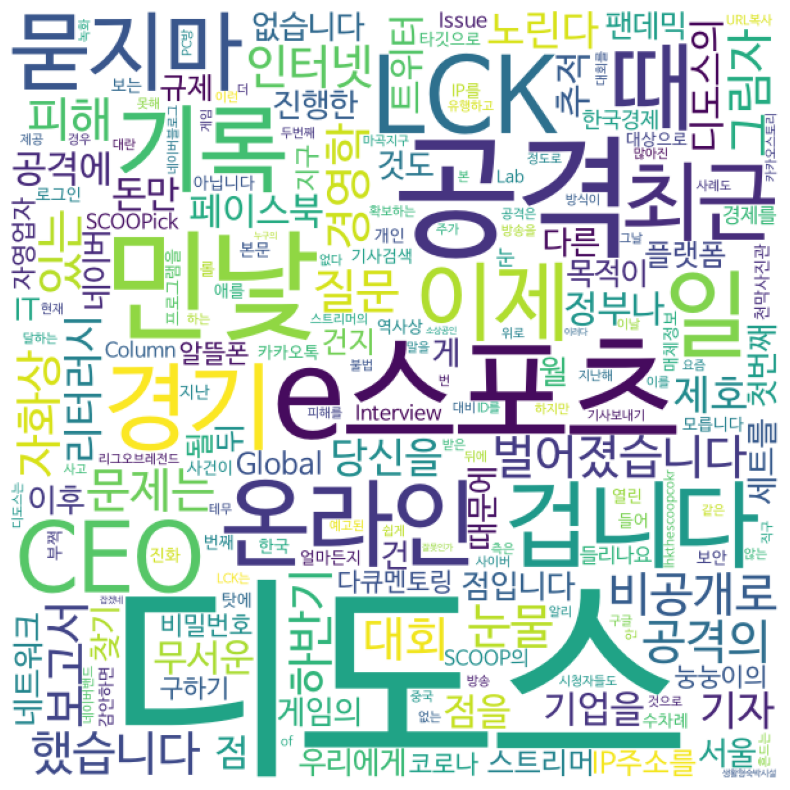

In [7]:
wordcloud = WordCloud(font_path='NanumBarunGothic.otf', background_color='white', width=600, height=600).generate_from_frequencies(word_count)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 2. ÌîåÎ†àÏù¥Ïä§ÌÜ†Ïñ¥ Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Î°§ÎßÅ(ÎèôÏ†Å ÌÅ¨Î°§ÎßÅ)

2.1 100Í∞ú Ïù¥ÏÉÅÏùò Î¶¨Î∑∞Î•º Í∞ÄÏßÑ Ïï±Ïóê ÏûàÎäî ÎåìÍ∏Ä Î¶¨Î∑∞Î•º ÌÅ¨Î°§ÎßÅÌïòÏãúÏò§.

In [8]:
# pip install google-play-scraper

In [9]:
from google_play_scraper import app

app_test = app(
    'com.navercorp.game.android.community',
    lang='ko',
    country='kr' 
)

app_test

{'title': 'ÏπòÏßÄÏßÅ ‚Äì CHZZK',
 'description': 'Î∞©ÏÜ°ÏùÑ ÏãúÏûëÌïòÎäî ÏÑ§Î†òÎ∂ÄÌÑ∞\r\nÏãúÏ≤≠ÏûêÏôÄ Ïä§Ìä∏Î¶¨Î®∏Í∞Ä ÎßåÎÇò ÏÜåÌÜµÌïòÍ∏∞ÍπåÏßÄ.\r\nÍ∑∏ Î™®Îì† ÏàúÍ∞ÑÏù¥ Ï¶êÍ±∞Ïö¥\r\nÏπòÏßÄÏßÅÏóêÏÑú Ïä§Ìä∏Î¶¨Î∞çÏù¥ ÏãúÏûëÎê©ÎãàÎã§.\r\n\r\n‚ö°ÏπòÏßÄÏßÅ\r\n- Îã§ÏñëÌïú Ïä§Ìä∏Î¶¨Î®∏Îì§Ïùò Î∞©ÏÜ°ÏùÑ ÎëòÎü¨Î≥¥Í≥† ÌåîÎ°úÏö∞\r\n- ÎßàÏùåÏóê ÎìúÎäî Î∞©ÏÜ°ÏùÄ Îã§Ïãú Î≥¥Í≥†\r\n- ÎÑ§Ïù¥Î≤ÑÌéòÏù¥Î°ú Ìé∏Î¶¨ÌïòÍ≤å ÌõÑÏõêÌïòÍ≥† Ï†ÅÎ¶ΩÍπåÏßÄ\r\n\r\nüéßeÏä§Ìè¨Ï∏†\r\n- LCK, Î°§ÎìúÏªµ, GSL Îì± Ï£ºÏöî Í≤ΩÍ∏∞ Ï†ïÎ≥¥ÏôÄ ÏòÅÏÉÅ ÌôïÏù∏\r\n- Ï¶êÍ≤®Î≥¥Îäî Î¶¨Í∑∏Îì§Ïùò Í≤ΩÍ∏∞ ÏïåÎ¶ºÎèÑ Î∞õÍ≥†\r\n- Í≥†ÌôîÏßà ÎùºÏù¥Î∏åÎ°ú Ìï®Íªò ÏãúÏ≤≠ÌïòÎ©∞ ÏùëÏõêÍπåÏßÄ\r\n\r\nüí¨ÎùºÏö¥ÏßÄ\r\n- Ï¢ãÏïÑÌïòÎäî Í≤åÏûÑÏùò ÎùºÏö¥ÏßÄÏóêÏÑú ÏÜåÌÜµ\r\n- ÎÑ§Ïù¥Î≤Ñ Í≤åÏûÑÏóêÏÑú ÏßÑÌñâÌïòÎäî ÏÇ¨Ï†ÑÏòàÏïΩ, Ïù¥Î≤§Ìä∏ Ï∞∏Ïó¨\r\n- ÏµúÏã† Îâ¥Ïä§, Í≤åÏûÑ Ï∂úÏãú Îì± ÎàÑÍµ¨Î≥¥Îã§ Îπ†Î•¥Í≤å Ï†ïÎ≥¥ Í≥µÏú†\r\n==============================================================\r\n[ÌïÑÏàò Ï†ëÍ∑º Í∂åÌïú]\r\n- Ïπ¥Î©îÎùº: Í≤åÏãúÍ∏Ä Î∞è ÌîÑÎ°úÌïÑ ÏÇ¨ÏßÑÏúºÎ°ú Ï¥¨Ï

In [10]:
from google_play_scraper import Sort, reviews_all

reviews = reviews_all(
    'com.navercorp.game.android.community',
    sort=Sort.NEWEST,
    lang='ko', 
    country='kr'
)

reviews

[{'reviewId': 'ffbc23c5-7802-44be-98be-c479e9ee2a53',
  'userName': "C'est Cool",
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjVoffjpiJAap2IH0L2NqEzoZDuN4CgMmBKNsOl-02cs8rc',
  'content': 'Î≤ÑÌçºÎßÅ ÎÑàÎ¨¥ Í±∏Î†§Ïöî 2Î∂ÑÏóê ÌïúÎ≤à Í±∏Î¶¨ÎäîÎìØ... Î∞©ÏÜ°ÏùÑ Î≥ºÏàòÍ∞Ä ÏóÜÏñ¥Ïöî',
  'score': 1,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '2.3.1',
  'at': datetime.datetime(2024, 3, 16, 20, 42, 39),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '2.3.1'},
 {'reviewId': '9f8d9ebb-4ba4-409f-96e5-3756899967b8',
  'userName': 'ÍπÄÏ†ïÍ¥Ä',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjV6Jmp3HnPrnAG0_VulLVOXFrrqfgOA1X7YXWZLtyqp_Wk',
  'content': 'Î≤†ÌÉÄÎùºÎäîÍ±∏ Í∞êÏïàÌï¥ÎèÑ ÏïàÏ†ïÏÑ±Ïù¥ Í∑πÌûà Îñ®Ïñ¥Ïßê ÌäπÏ†ï Ïú†Ï†ÄÏùò Ïä§Ìä∏Î¶¨Î∞çÎßå Î¨¥Ìïú Î≤ÑÌçºÎßÅ Í±∏Î¶¨Í≥† Ï£ºÍ∏∞Ï†ÅÏúºÎ°ú Î≤ÑÌçºÎßÅÏù¥ ÏàòÏã≠Î≤à Í±∏Î¶¨Îãà Ïï± ÏïàÏ†ïÏÑ±Ïù¥ Í∞ÄÌûà ÏµúÏïÖÏù¥Îùº Ìï†ÏàòÏûàÎã§',
  'score': 2,
  'thumbsUpCount': 1,
  'reviewCreatedVersion': None,
  'at': datetim

2.2 ÌÅ¨Î°§ÎßÅÌïú Îç∞Ïù¥ÌÑ∞Î•º dataframe ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïòÏãúÏò§(ÎÇ†Ïßú, Î≥ÑÏ†ê, Î¶¨Î∑∞ Ïú†Ï†Ä Îì±).

In [11]:
import pandas as pd

review_df = pd.DataFrame(reviews)
review_df

reviewId    userName  \
0    ffbc23c5-7802-44be-98be-c479e9ee2a53  C'est Cool   
1    9f8d9ebb-4ba4-409f-96e5-3756899967b8         ÍπÄÏ†ïÍ¥Ä   
2    aea16510-4467-4fc9-95f4-45916fb899a4          ÏóîÎπô   
3    02889c34-fbb8-4955-adf0-ff777185efe4          Ï£ºÍµ∞   
4    136fa8d7-78d0-4bfe-ae2d-8145bcb50a0d         SÏáºÏö∞   
..                                    ...         ...   
393  fb3b38e6-17a9-4b3e-abfc-ffbd63cb789b     uaevuon   
394  01ab3114-50d5-4acf-a252-9ad2fcbbf277    Î©îÍ∞ÄÎü∞Ï≥êÌÇ¨Í∞ÄÎìúÎùº   
395  c22a7d79-cfe9-41f4-bc0c-c3c14d56fd64        ÍπÄÍ∞ÄÏò§Î¶¨   
396  c9a7a64d-1cc0-4586-baee-0316f2b10df5          ÏàòÏä§   
397  39d72e52-08c8-41b1-aa2d-f70706e71935        ÌéòÎàåÌã∞Î™®   

                                             userImage  \
0    https://play-lh.googleusercontent.com/a-/ALV-U...   
1    https://play-lh.googleusercontent.com/a-/ALV-U...   
2    https://play-lh.googleusercontent.com/a-/ALV-U...   
3    https://play-lh.googleusercontent.com/a/ACg8oc...   
4    https://play-lh.googleusercontent.com/a-/ALV-U...   
..                                                 ...   
393  https://play-lh.googleusercontent.com/a-/ALV-U...   
394  https://play-lh.googleusercontent.com/a-/ALV-U...   
395  https://play-lh.googleusercontent.com/a-/ALV-U...   
396  https://play-lh.googleusercontent.com/a/ACg8oc...   
397  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                               content  score  thumbsUpCount  \
0                Î≤ÑÌçºÎßÅ ÎÑàÎ¨¥ Í±∏Î†§Ïöî 2Î∂ÑÏóê ÌïúÎ≤à Í±∏Î¶¨ÎäîÎìØ... Î∞©ÏÜ°ÏùÑ Î≥ºÏàòÍ∞Ä ÏóÜÏñ¥Ïöî      1              0   
1    Î≤†ÌÉÄÎùºÎäîÍ±∏ Í∞êÏïàÌï¥ÎèÑ ÏïàÏ†ïÏÑ±Ïù¥ Í∑πÌûà Îñ®Ïñ¥Ïßê ÌäπÏ†ï Ïú†Ï†ÄÏùò Ïä§Ìä∏Î¶¨Î∞çÎßå Î¨¥Ìïú Î≤ÑÌçºÎßÅ Í±∏Î¶¨Í≥†...      2              1   
2    Î¨¥Ïä® ÏßìÏùÑ Ìï¥ÎèÑ ÏïàÍ∫ºÏßê ÌïòÎçòÍ±∞ Îã§ ÎÇ†Î¶¨Í≥† Ìè∞ÏùÑ ÍªêÎã§ ÌÇ®Í≤å ÌïúÎëêÎ≤àÏù¥ ÏïÑÎãò ÎÑàÎ¨¥ ÏßúÏ¶ùÎÇò...      1              0   
3                     ÏπòÏßÄÏßÅ Ï†ïÏãùÏò§ÌîàÎïåÎäî ÌåîÎ°úÏûâÎèÑ ÏÑ∏Î°úÌï¥Ï£ºÏãúÍ≥† ÎØ∏Î¶¨Î≥¥Í∏∞ Ìï¥Ï£ºÏÑ∏Ïöî      1              0   
4                                    Î™®Î∞îÏùº Î∞©ÏÜ°ÎèÑ Í∞ÄÎä•ÌïòÍ≤åÌï¥Ï£ºÏÑ∏Ïöî„Ö†      5              0   
..                                                 ...    ...            ...   
393  ÏòÅÏÉÅ ÎåÄÏã† Ïï± ÌôîÎ©¥ pipÎ°ú Îì§Ïñ¥Í∞ÄÎ≤ÑÎ¶¨Îäî Î≤ÑÍ∑∏Îäî ÎåÄÏ≤¥ Ïñ∏Ï†úÍ≥†Ï≥êÏ£ºÎäîÏßÄ. Î∂àÌé∏Ìï¥ÏÑú Ïç®Î®π...      1              3   
394  Ìä∏ÏúÑÏπòÏôÄÎäî Îã¨Î¶¨ ÎØ∏ÏÑ±ÎÖÑÏûê Î∞©ÏÜ°Ïù¥ ÏïàÎêòÎäîÍ±¥ Ïù¥Ï†ú Îßâ Î∞©ÏÜ°ÏùÑ ÏãúÏûëÌïòÎ†§Îäî Í≥†Îî©ÏóêÍ≤ê Ï¢Ä Îßé...      4              1   
395  Ïù¥Ï†ú Îßâ ÏÉùÍ∏¥ Ïï±Ïù¥Í≥† ÏïûÏúºÎ°ú ÎßéÏù¥ Î∞úÏ†ÑÌïòÍ≤†ÏßÄÎßå ÏïÑÏßÅ Î∂àÌé∏Ìïú Ï†êÏù¥ Ï°∞Í∏à ÏûàÏäµÎãàÎã§. Í∑º...      4              0   
396        ÏãúÏ≤≠ÏûêÏàò 5Ï≤úÎ™ÖÏù¥ÎÑòÏñ¥Í∞ÄÎ©¥ Î¨¥ÌïúÎ≤ÑÌçºÎßÅÏù¥Íµ¨Îßå ÏóÖÎç∞Ïù¥Ìä∏ÌïòÍ≥†ÎÇòÏÑú ÏôúÏù¥Î¶¨ Î≤ÑÌçºÎßÅÏù¥Í±∏Î¶º?      1              2   
397  Ïä§Ìä∏Î¶¨Î®∏ Î∞©ÏÜ° Ïò® ÏïåÎ¶º Ïä§ÏúÑÏπòÎ•º ÏºúÎèÑ ÏïåÎ¶ºÏù¥ ÏïàÏôÄÏÑú Í¥ÄÎ†®Ìï¥ÏÑú Í∞úÏÑ†Ïù¥ ÌïÑÏöîÌïòÎã§Í≥† ÎäêÍª¥...      1              3   

    reviewCreatedVersion                  at  \
0                  2.3.1 2024-03-16 20:42:39   
1                   None 2024-03-16 19:12:37   
2                  2.3.1 2024-03-16 17:56:00   
3                  2.3.1 2024-03-16 16:57:59   
4                  2.3.1 2024-03-16 16:08:14   
..                   ...                 ...   
393                2.3.0 2024-02-27 02:24:10   
394                2.2.3 2024-02-27 01:49:45   
395                2.3.0 2024-02-27 01:30:29   
396                2.3.0 2024-02-27 01:27:49   
397                2.3.0 2024-02-27 01:08:40   

                                          replyContent           repliedAt  \
0                                                 None                 NaT   
1                                                 None                 NaT   
2                                                 None                 NaT   
3                                                 None                 NaT   
4                                                 None 

ÎÇ†Ïßú, Î≥ÑÏ†ê, Î¶¨Î∑∞, Ïú†Ï†ÄÎßå Í∞ÄÏ†∏Ïò§Í∏∞

In [12]:
review_part = review_df[['at', 'userName', 'content','score']]
review_part.columns = ['ÎÇ†Ïßú','Ïú†Ï†Ä Ïù¥Î¶Ñ', 'Î¶¨Î∑∞','ÌèâÏ†ê']
review_part.head(10)

ÎÇ†Ïßú       Ïú†Ï†Ä Ïù¥Î¶Ñ  \
0 2024-03-16 20:42:39  C'est Cool   
1 2024-03-16 19:12:37         ÍπÄÏ†ïÍ¥Ä   
2 2024-03-16 17:56:00          ÏóîÎπô   
3 2024-03-16 16:57:59          Ï£ºÍµ∞   
4 2024-03-16 16:08:14         SÏáºÏö∞   
5 2024-03-16 15:05:30         Ïú†ÎèôÍ±¥   
6 2024-03-15 21:28:47     Ïπ¥Í≤åÎ°úÏö∞Î°úÏù¥Îìú   
7 2024-03-15 19:45:14     s super   
8 2024-03-15 19:19:12         ÎÇ®Ï§ëÌÉú   
9 2024-03-15 18:23:18          ÏÑ±Í∞Å   

                                                  Î¶¨Î∑∞  ÌèâÏ†ê  
0              Î≤ÑÌçºÎßÅ ÎÑàÎ¨¥ Í±∏Î†§Ïöî 2Î∂ÑÏóê ÌïúÎ≤à Í±∏Î¶¨ÎäîÎìØ... Î∞©ÏÜ°ÏùÑ Î≥ºÏàòÍ∞Ä ÏóÜÏñ¥Ïöî   1  
1  Î≤†ÌÉÄÎùºÎäîÍ±∏ Í∞êÏïàÌï¥ÎèÑ ÏïàÏ†ïÏÑ±Ïù¥ Í∑πÌûà Îñ®Ïñ¥Ïßê ÌäπÏ†ï Ïú†Ï†ÄÏùò Ïä§Ìä∏Î¶¨Î∞çÎßå Î¨¥Ìïú Î≤ÑÌçºÎßÅ Í±∏Î¶¨Í≥†...   2  
2  Î¨¥Ïä® ÏßìÏùÑ Ìï¥ÎèÑ ÏïàÍ∫ºÏßê ÌïòÎçòÍ±∞ Îã§ ÎÇ†Î¶¨Í≥† Ìè∞ÏùÑ ÍªêÎã§ ÌÇ®Í≤å ÌïúÎëêÎ≤àÏù¥ ÏïÑÎãò ÎÑàÎ¨¥ ÏßúÏ¶ùÎÇò...   1  
3                   ÏπòÏßÄÏßÅ Ï†ïÏãùÏò§ÌîàÎïåÎäî ÌåîÎ°úÏûâÎèÑ ÏÑ∏Î°úÌï¥Ï£ºÏãúÍ≥† ÎØ∏Î¶¨Î≥¥Í∏∞ Ìï¥Ï£ºÏÑ∏Ïöî   1  
4                                  Î™®Î∞îÏùº Î∞©ÏÜ°ÎèÑ Í∞ÄÎä•ÌïòÍ≤åÌï¥Ï£ºÏÑ∏Ïöî„Ö†   5  
5                                 Í¥ëÍ≥†Í∞Ä 15Î∂ÑÎßàÎã§ Îú®ÎÑ§. Î≤ÑÍ∑∏ÏûÑ?   1  
6  Îã§ Ï¢ãÏùÄÎç∞ Í¥ëÍ≥†Í∞Ä Í≥ºÌï®. Îî¥ Î∞©ÏÜ° Î≥ºÎ†§ÌïòÎ©¥ Í¥ëÍ≥† Îòê Ïû†Íπê Îî¥ Î∞©ÏÜ° Î≥ºÎ†§ÌïòÎ©¥ Í¥ëÍ≥†ÏûÑ....   4  
7                 TvÏï±Ïä§ÌÜ†Ïñ¥Ïóê Ìè¨Ìï®Ï¢Ä ÏãúÏºúÏ£ºÏÑ∏Ïöî Ìã∞ÎπÑÎ°ú Î≥¥Í≥†Ïã∂Ïñ¥ÎèÑ ÏóÜÏñ¥ÏÑú Î™ªÎ¥Ñ   5  
8          Ìï∏ÎìúÌè∞ÏùÑ Í∫ºÎèÑ ÏÜåÎ¶¨Í∞Ä Í≥ÑÏÜç Îì§Î¶¨ÎãàÍπå Î∂àÌé∏Ìï¥Ïöî. Í∑∏Ï†ê ÎßêÍ≥§ Í¥úÏ∞ÆÏùÄÍ≤É Í∞ôÏïÑÏöî.   4  
9                                       Ïì∞Î†àÍ∏∞Ïñ¥Ìîå Î≤ÑÌçºÎßÅ Ïã¨Ìï®   1

2.3 Í∏çÏ†ï Î¶¨Î∑∞ÏôÄ Î∂ÄÏ†ï Î¶¨Î∑∞Î•º ÎÇòÎàÑÏãúÏò§(Í∏∞Ï§ÄÏùÄ ÏûêÏú†).

In [13]:
posit_rev = review_part[review_part['ÌèâÏ†ê'] >= 4]

negat_rev = review_part[review_part['ÌèâÏ†ê'] <= 2]

In [14]:
print('Í∏çÏ†ï Î¶¨Î∑∞')
posit_rev = posit_rev.sort_values(by='ÌèâÏ†ê', ascending=False)
posit_rev.head(10)

Í∏çÏ†ï Î¶¨Î∑∞


ÎÇ†Ïßú    Ïú†Ï†Ä Ïù¥Î¶Ñ  \
4   2024-03-16 16:08:14      SÏáºÏö∞   
190 2024-03-02 01:49:13       Î∞±Í≥µ   
222 2024-02-29 23:33:49      ÍπÄÏòÅÌõà   
218 2024-03-01 00:19:51      Ïù¥Ïä§Ïóê   
217 2024-03-01 00:49:59      Ïú§ÏßÄÎÑå   
349 2024-02-27 16:37:36     Ìï†Í±∞ÏóÜÏÑú   
350 2024-02-27 16:26:25       ÏòÅÎøå   
208 2024-03-01 07:32:36   gggoup   
207 2024-03-01 09:00:18    Ïπ¥Ïù¥Î∞îÏÑ∏ÌÜ†   
197 2024-03-01 18:33:58  Îç∞ÎØ∏ÏñÄÎìúÏ∫¨ÎØ∏Ïóò   

                                                    Î¶¨Î∑∞  ÌèâÏ†ê  
4                                    Î™®Î∞îÏùº Î∞©ÏÜ°ÎèÑ Í∞ÄÎä•ÌïòÍ≤åÌï¥Ï£ºÏÑ∏Ïöî„Ö†   5  
190                                Îπ†Î•∏ÏàòÏ†ï Í∞êÏÇ¨Ìï©ÎãàÎã§ ÏÇ¨ÎûëÌï¥Ïöî ÏπòÏßÄÏßÅ   5  
222                                     ÎßåÎì§Ïñ¥Ï£ºÏÖîÏÑú Í∞êÏÇ¨Ìï©ÎãàÎã§..   5  
218                          ÏπòÏßÄÏßÅ Íµ¨ÎèÖ ÏÑ†Î¨º üéÅ Í∏∞Îä•Ïù¥ ÏûàÏúºÎ©¥ Ï¢ãÍ≤†ÏäµÎãàÎã§   5  
217                                                ÏπòÏßÄÏßÅ   5  
349                                               good   5  
350                                  Ïó¨Í∏∞Ïóê ÎàÑÍ∞Ä Î≥ÑÏ†êÌÖåÎü¨Î•ºÌïòÏòÄÎäîÍ∞Ä~   5  
208  2ÏõîÎßê Ï¶àÏùåÎ∂ÄÌÑ∞ ÏòÅÏÉÅ ÏòµÏÖòÎ≤ÑÌäºÏùÑ ÎàåÎü¨ÎèÑ ÌôîÎ©¥Îßå Ïñ¥ÎëêÏõåÏßÄÍ≥† ÏòµÏÖòÏ∞ΩÏù¥ Ïïà ÎÇòÏò§Îäî Î≤ÑÍ∑∏Í∞Ä...   5  
207                                                  üëç   5  
197  TVÏóêÏÑúÎäî ÏïàÎêòÎÇòÏöî? Ìä∏ÏúÑÏπòÎÇòÏïÑÌîÑÎ¶¨Ïπ¥Îì±ÏùÄ Í∞ÄÎä•ÌïúÎç∞ ÏπòÏßÄÏßÅÏùÄ ÏïàÎêòÎÑ§Ïöî ÌÅ∞ÌôîÎ©¥ÏúºÎ°ú Î≥¥Í≥†...   5

In [15]:
print('Î∂ÄÏ†ï Î¶¨Î∑∞')
negat_rev = negat_rev.sort_values(by='ÌèâÏ†ê', ascending=True)
negat_rev.head(10)

Î∂ÄÏ†ï Î¶¨Î∑∞


ÎÇ†Ïßú           Ïú†Ï†Ä Ïù¥Î¶Ñ  \
0   2024-03-16 20:42:39      C'est Cool   
225 2024-02-29 22:43:21             ÍπÄÏùÄÏÑú   
229 2024-02-29 22:05:47              Ï∞®Ï∞®   
231 2024-02-29 21:40:50              Ï∞åÎøå   
237 2024-02-29 17:20:37           Jun g   
238 2024-02-29 16:54:12             ÌïúÏ§ÄÏòÅ   
240 2024-02-29 15:25:31             Ïã†ÏÑ∏Ìôò   
242 2024-02-29 13:36:17        RwbyRose   
224 2024-02-29 23:13:48           ÌõÑÎ£∏ÎùºÏù¥Îìú   
243 2024-02-29 10:53:55  ÎãàÏãúÎÖ∏ ÎÇòÎÇòÏÑ∏TVÎÇòÎÇòÏÑ∏ÎßàÎ£®   

                                                    Î¶¨Î∑∞  ÌèâÏ†ê  
0                Î≤ÑÌçºÎßÅ ÎÑàÎ¨¥ Í±∏Î†§Ïöî 2Î∂ÑÏóê ÌïúÎ≤à Í±∏Î¶¨ÎäîÎìØ... Î∞©ÏÜ°ÏùÑ Î≥ºÏàòÍ∞Ä ÏóÜÏñ¥Ïöî   1  
225       ÏôÄ ÏßÑÏßú Î†âÏù¥ ÎÑàÎ¨¥Í±∏Î¶º..„Öã„Öã 720pÎ°ú Î≥¥ÎäîÎç∞ÎèÑ ÏßÑÏßú 15Ï¥àÏóê ÌïúÎ≤à ÎÅäÍ∏∞Îäî..   1  
229                      Ï±ÑÌåÖÏ∞ΩÎèÑ ÏïàÎú®Í≥† ÌôîÏßàÏÑ§Ï†ïÎèÑ Ìï†ÏàòÏóÜÏùå „Ö°„Ö° Í∞§23Ïö∏Ìä∏Îùº   1  
231                     Î∞©ÏÜ° Ï±ÑÌåÖÎã§ÎäîÍ≤å ÏïàÎêòÎäîÎç∞ Ïò§Î•òÏù∏Í±¥Í∞ÄÏöî? Ïôú ÏïàÎêòÎäî Í±¥ÏßÄ   1  
237                            Ìï¥ÏÉÅÎèÑ ÏÑ§Ï†ïÏù¥ Ïôú ÏïàÎêòÎäîÍ≤ÅÎãàÍπå? Í≥†Ï≥êÏ£ºÏÉàÏöî   1  
238  Ïò§Îäò ÍπîÏïòÎäîÎç∞ ÌôîÏßà Í∞úÍ∞ôÏïÑÏÑú ÏßÄÏõÄ ÏõêÎûò Ïù¥Îü∞Í±∞ÏûÑ??ÏÑ§Ï†ïÎèÑ ÏïàÎêòÍ≥†??ÎÑ§Ïù¥Î≤Ñ Î≠ê Î≥ÑÍ±∞ÏóÜ...   1  
240  Ï∞®ÏßÄÏßÅ ÏÉùÎ∞©Î≥¥ÎäîÎç∞ Î†âÎïåÎ¨∏Ïóê ÏûêÏ£º ÎÅäÍ∏∞Í≥† Í∞ïÏ†úÏ¢ÖÎ£åÍ∞Ä ÎêòÎäîÏùºÏù¥ ÏûêÏ£º ÏùºÏñ¥ÎÇ®. Í∞úÏÑ†Ïù¥ ÌïÑ...   1  
242  Ï†ïÎßê ÌïÑÏöîÌñàÎçò Í∞ÄÎä•Îì§ Îã§ Îì§Ïñ¥Í∞ÑÍ±∞ Í∞ôÏïÑÏöî. ÌïòÏßÄÎßå Î¨∏Ï†ú Ï†êÎèÑ ÎßéÏù¥ ÏûàÎÑ§Ïöî 1. ÎîúÎ†à...   1  
224                                Î™®Î∞îÏùº Ïï± Î∞ùÍ∏∞/ÏùåÎüâ Ï°∞Ï†à ÏôúÎßåÎì¶?   1  
243  ÎßåÎì†Í≤ÉÎèÑ Ïñ¥Îîî 3Î•ò ÏßÄ1Ïû°ÎåÄ Íº¥ÌÜµÏù¥ Ï≤òÏ°∏Î©¥ÏÑú ÎßåÎì§ÏóàÎÇò Ïö¥Ï¢ãÍ≤å Í∏ÄÎ°úÎ≤å ÎåÄÍ∏∞ÏóÖ Ìä∏ÏúÑÏπòÍ∞Ä...   1

### 3. ÏûêÏú† Î∂ÑÏÑù

3.1 ÏúÑÏóêÏÑú ÌÅ¨Î°§ÎßÅÌïú Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ ÌôúÏö©Ìï¥ ÏûêÏú†Î°≠Í≤å Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º ÎèÑÏ∂úÌïòÏãúÏò§.

In [60]:
# pip install konlpy

In [16]:
from konlpy.tag import Okt
from collections import Counter

In [43]:
# Í∏çÏ†ï Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ Ïàò
positive_count = len(review_part[review_part['ÌèâÏ†ê'] >= 4])

# Î∂ÄÏ†ï Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ Ïàò
negative_count = len(review_part[review_part['ÌèâÏ†ê'] <= 2])

# Ï†ÑÏ≤¥ Î¶¨Î∑∞ Ïàò 
total_count = len(review_part)

# Í∏çÏ†ï Î¶¨Î∑∞ÏôÄ Î∂ÄÏ†ï Î¶¨Î∑∞Í∞Ä Ï∞®ÏßÄÌïòÎäî ÎπÑÏú® 
positive_ratio = positive_count / total_count
negative_ratio = negative_count / total_count

print("ÌèâÏ†êÏù¥ 4Ï†ê Ïù¥ÏÉÅÏù∏ Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®:", positive_ratio)
print("ÌèâÏ†êÏù¥ 2Ï†ê Ïù¥ÌïòÏù∏ Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®:", negative_ratio)


ÌèâÏ†êÏù¥ 4Ï†ê Ïù¥ÏÉÅÏù∏ Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®: 0.36432160804020103
ÌèâÏ†êÏù¥ 2Ï†ê Ïù¥ÌïòÏù∏ Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®: 0.45979899497487436


Í∏çÏ†ï Î¶¨Î∑∞ Î∂ÑÏÑù

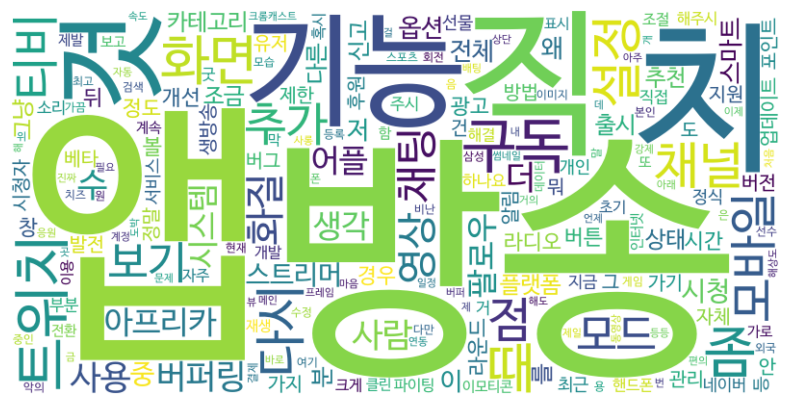

In [47]:
# ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞
okt = Okt()

content = posit_rev

token = []

for content in posit_rev['Î¶¨Î∑∞']:
    token.extend(okt.nouns(content))

# Îã®Ïñ¥ ÎπàÎèÑÏàò Í≥ÑÏÇ∞
wc = Counter(token)

# Í∏çÏ†ï Î¶¨Î∑∞ Í∞úÏàò = 3360Í∞ú x 0.36 = 1209Í∞ú 
filtered_word_counts = {word: count for word, count in wc.items() if count > 400}

wordcloud = WordCloud(font_path='NanumBarunGothic.otf', background_color='white', width=800, height=400).generate_from_frequencies(wc)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Í∏çÏ†ï Î¶¨Î∑∞ Ï§ëÏóêÏÑú ÎßéÏù¥ Îì±Ïû•ÌïòÎäî Îã®Ïñ¥Îäî Ïï±, Î∞©ÏÜ°, Í∏∞Îä•, Ìä∏ÏúÑÏπò, Î™®Î∞îÏùºÏù¥ ÏûàÎã§.   
ÏπòÏßÄÏßÅÏùÄ ÏõêÎûò ÎÑ§Ïù¥Î≤ÑÏóêÏÑú Í≤åÏûÑ Ïª§ÎÆ§ÎãàÌã∞ Ïï±ÏúºÎ°ú Ï∂úÏãúÎêòÏóàÏúºÎÇò, Ïù∏ÌÑ∞ÎÑ∑ Î∞©ÏÜ° ÌîåÎû´ÌèºÏù∏ Ìä∏ÏúÑÏπòÍ∞Ä ÌïúÍµ≠ ÏÑúÎπÑÏä§Î•º Ï§ëÎã®ÌïúÎã§Îäî ÏÜåÏãùÏùÑ Îì£Í≥† Ïù∏ÌÑ∞ÎÑ∑ Î∞©ÏÜ° ÌîåÎû´ÌèºÏúºÎ°ú Ï†ÑÌôòÌïòÏòÄÎã§.    
Í∑∏ÎûòÏÑú Ïù∏ÌÑ∞ÎÑ∑ Î∞©ÏÜ°ÏùÑ Ï¶êÍ≤® Î≥¥Îçò ÏÇ¨ÎûåÎì§ÏùÄ Ìä∏ÏúÑÏπòÎ•º ÎåÄÏ≤¥Ìï† Î∞©ÏÜ° ÌîåÎû´ÌèºÏù¥ ÏÉùÍ≤®ÎÇú Í≤ÉÏùÑ Îã§ÌñâÏúºÎ°ú Ïó¨Í≤® ÏúÑ Îã®Ïñ¥Îì§ÏùÑ ÎßéÏù¥ Ïñ∏Í∏âÌïú Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§. 

\
Îã§Îßå, Ï∂©Î∂ÑÌïú Ï§ÄÎπÑ ÏóÜÏù¥ Ï†ÑÌôòÌïú ÎßåÌÅº ÎØ∏Ìù°Ìïú Î∂ÄÎ∂ÑÏù¥ ÎßéÏïòÎäîÏßÄ Í∏çÏ†ï Î¶¨Î∑∞Îßå Ï∂îÏ∂úÌñàÏùåÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Í∞úÏÑ†, Î≤ÑÌçºÎßÅ, ÏóÖÎç∞Ïù¥Ìä∏, Î≤ÑÍ∑∏ Îì± Í∞úÏÑ† ÏÇ¨Ìï≠ÎèÑ Î≥¥Ïù∏Îã§. 

Î∂ÄÏ†ï Î¶¨Î∑∞ Î∂ÑÏÑù

In [50]:
# ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞
okt = Okt()

content = negat_rev

token = []

for content in negat_rev['Î¶¨Î∑∞']:
    token.extend(okt.nouns(content))

# Îã®Ïñ¥ ÎπàÎèÑÏàò Í≥ÑÏÇ∞
wc = Counter(token)

# Î∂ÄÏ†ï Î¶¨Î∑∞ Í∞úÏàò = 3360Í∞ú x 0.46 = 2150Í∞ú
# Îã®, Î™®Îì† Î∂ÄÏ†ï Î¶¨Î∑∞Í∞Ä 
filtered_word_counts = {word: count for word, count in wc.items() if count > 700}

wordcloud = WordCloud(font_path='NanumBarunGothic.otf', background_color='white', width=800, height=400).generate_from_frequencies(wc)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Í∞ÄÏû• ÎßéÏù¥ Îì±Ïû•Ìïú Îã®Ïñ¥ Ï§ëÏóêÏÑú Ïú†Ïã¨Ìûà Î≥º Í≤ÉÏùÄ Î≤ÑÌçºÎßÅ, Ï±ÑÌåÖ, Î≤ÑÍ∑∏, ÌôîÏßà, ÏÑ§Ï†ï Îì±Ïù¥ ÏûàÎäîÎç∞, Î∞©ÏÜ° ÏãúÏ≤≠Ïóê ÏûàÏñ¥ Î∂àÌé∏Ìïú ÏÇ¨Ìï≠Îì§ÏùÑ Î¶¨Î∑∞Î°ú ÎÇ®Í∏¥ Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.  

Ìä∏ÏúÑÏπòÎùºÎäî Îã®Ïñ¥Í∞Ä Ïó¨Í∏∞ÏóêÏÑúÎèÑ Îì±Ïû•ÌïòÎäîÎç∞, Ìä∏ÏúÑÏπòÏôÄ ÏπòÏßÄÏßÅÏùÑ ÎπÑÍµêÌïòÎ©¥ÏÑú Î∂ÄÏ†ïÏ†ÅÏù∏ Î¶¨Î∑∞Î•º Îã§Îäî ÏÇ¨ÎûåÎì§Ïù¥ ÎßéÏùÄ Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§. 

ÏßÑÏßú, Ï¢Ä, Ï†úÎ∞ú Îì±Ïùò Îã®Ïñ¥Í∞Ä Îì±Ïû•ÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ, ÏÇ¨ÎûåÎì§Ïù¥ Ïï±Ïùò Í∏∞Îä•Ïóê ÎåÄÌï¥ ÎãµÎãµÌïú Î∂ÄÎ∂ÑÏù¥ ÎßéÏùÄ Í≤É Í∞ôÎã§. 

